In [1]:
from utils import *

In [2]:
# Works for angle = pi
def cartesian_evo(t, x0):
    x, y, z = x0
    mid = (x + z)/ 2
    dist = (z - x) /2
    cost = np.cos(2*t)
    sint = np.sin(2*t)
    
    # Define functions
    x = mid - dist * cost
    y = - np.sqrt(2) * dist * sint
    z = mid + dist * cost
    return (x,y,z)

In [3]:
trange = np.arange(0, 2*np.pi, 0.1)

ang = np.pi
r = np.random.uniform(np.sqrt(0.9), 1)


z0 = np.array([r, np.sqrt(1 - r**2) * np.exp(1j * ang)])
x0 = state_to_bloch([z0[0]], [z0[1]])
x0 = x0[0] + x0[1] + x0[2]

cart = [cartesian_evo(t, x0) for t in trange]
xps, yps, zps = [c[0] for c in cart], [c[1] for c in cart], [c[2] for c in cart]

z_vec, o_vec = get_states(trange, z0, had_ham)
xs, ys, zs, _ = state_to_bloch(z_vec, o_vec)

print(x0, z0)
print("Avg error:")
for z in [zip(xs, xps), zip(ys, yps), zip(zs,zps)]:
    avg_error = np.mean([abs(i-j) for i,j in z])
    print(avg_error)

[-0.20083618062608247, 2.4595338575671157e-17, 0.9796248407178778] [ 0.99489317+0.00000000e+00j -0.10093354+1.23607938e-17j]
Avg error:
3.5212133033002237e-16
4.389725533957818e-16
3.6607484019432786e-16


Avg error:
3.70900400339803e-16
4.1854630566357593e-16
3.661299107808668e-16


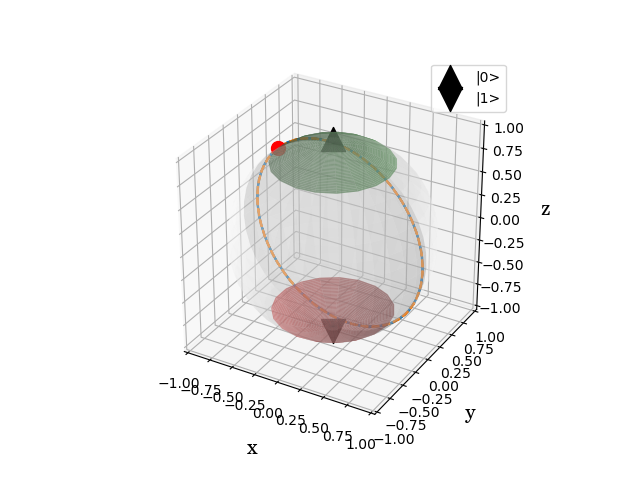

In [4]:
%matplotlib widget
trange = np.arange(0, 2*np.pi, 0.1)
x0 = [-3/5,0,4/5]

evo = lambda t: [1/10 - 7/10 * np.cos(2*t),  -7/(5*np.sqrt(2)) * np.sin(2*t), 1/10 + 7/10 * np.cos(2*t)]

def sys_evo(trange):
    sys = np.array([evo(t) for t in trange])
    xs = [s[0] for s in sys]
    ys = [s[1] for s in sys]
    zs = [s[2] for s in sys]
    return xs, ys, zs

def cart_transformation(trange, x0, ax):
    xs, ys, zs = sys_evo(trange)
    ax.plot(xs,ys,zs)
    
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',box_aspect=(1,1,1))

plot_bloch_regions(ax)

cart_transformation(trange, x0, ax)

ang = np.pi
r = np.sqrt(0.9)
z0 = r
z1 = np.sqrt(1 - r**2) * np.exp(1j * ang)
bloch_transformation(trange, np.array([z0, z1]), had_ham, ax)

z_vec, o_vec = get_states(trange, np.array([z0, z1]), had_ham)
xs, ys, zs, _ = state_to_bloch(z_vec, o_vec)
xps, yps, zps =  sys_evo(trange)

print("Avg error:")
for z in [zip(xs, xps), zip(ys, yps), zip(zs,zps)]:
    avg_error = np.mean([abs(i-j) for i,j in z])
    print(avg_error)
          
ax.legend()
plt.show()

# Rotated Cartesian Form

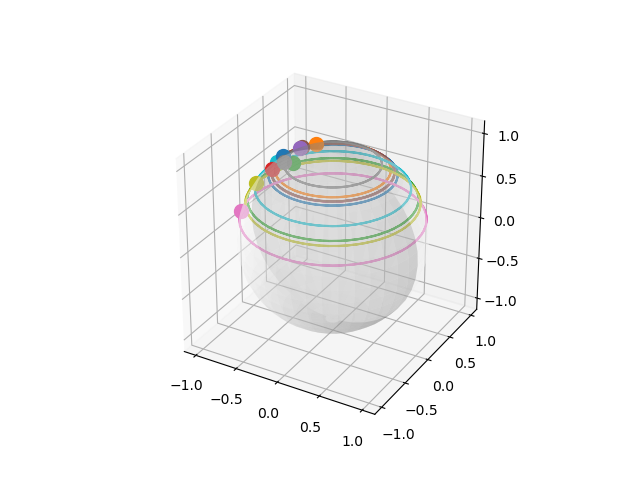

In [5]:
%matplotlib widget

step = 0.1
t0 = 0
t = 2*np.pi
dXdt = lambda x, t: np.array([-2*x[1], 2*x[0], 0])

def rot_cart_init():
    phi, delta = randang(), randang()
    r = np.random.uniform(np.sqrt(0.9), 1)
    # State form
    z0 = np.array([r * np.exp(1j * delta), np.sqrt(1 - r**2) * np.exp(1j * phi)])
    x0 = state_to_bloch([z0[0]], [z0[1]])
    # Not rotated Cartesian form
    X0 = x0[0] + x0[1] + x0[2]
    X0r = [(X0[0] - X0[2])/np.sqrt(2), X0[1], (X0[0] + X0[2])/np.sqrt(2)]
    return X0r

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',box_aspect=(1,1,1))
for i in range(10):
    X0 = rot_cart_init()
    dataSet, ts = rk4(X0, t0, t, step, dXdt)
    dataSet = dataSet.T
    ax.plot(dataSet[0],dataSet[1],dataSet[2], label=str(X0))
    ax.scatter(dataSet.T[0][0],dataSet.T[0][1],dataSet.T[0][2], label=str(dataSet.T[0]), s=100)

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))
ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='w', alpha=0.3, linewidth=0)    
plt.show()

In [6]:
%matplotlib inline

X0 = rot_cart_init()
dataSet, ts = rk4(X0, t0, t, step, dXdt)
dataSet = dataSet.T
numDataPoints = len(ts)

def animate_func(num):
    ax.clear()
    
    # Plots sphere
    phi = np.linspace(0, np.pi, 20)
    theta = np.linspace(0, 2 * np.pi, 40)
    x = np.outer(np.sin(theta), np.cos(phi))
    y = np.outer(np.sin(theta), np.sin(phi))
    z = np.outer(np.cos(theta), np.ones_like(phi))
    ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='w', alpha=0.3, linewidth=0)    

    # Plots trajectory line
    ax.plot(dataSet[0, :num+1], dataSet[1, :num+1], 
              dataSet[2, :num+1], color='blue')

    # Updating Point Location
    ax.scatter(dataSet[0, num], dataSet[1, num], dataSet[2, num], 
               color='blue', marker='o', s=100)
    
    # Add start point
    origin = str((dataSet[0, 0], dataSet[1, 0], dataSet[2, 0]))
    ax.plot3D(dataSet[0, 0], dataSet[1, 0], dataSet[2, 0],
              c='black', marker='o', label=origin)

    # Setting Axes Limits
    ax.set_xlim3d([-1, 1])
    ax.set_ylim3d([-1, 1])
    ax.set_zlim3d([-1, 1])

    # Adding Figure
    ax.set_title('Rotated Cartesian Evolution\nTime = ' + str(np.round(ts[num],    
                 decimals=2)) + ' sec')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',box_aspect=(1,1,1))

# Plotting the Animation
# line_ani = animation.FuncAnimation(fig, animate_func, interval=100,   
#                                    frames=numDataPoints)

# anim = HTML(line_ani.to_jshtml())
plt.close(fig)
print(X0)
# anim

[-0.39638560710233695, -0.025131693291123844, 0.9177400767507282]


# Cartesian Form

In [7]:
def cart_bloch_init():
    phi, delta = randang(), randang()
    r = np.random.uniform(np.sqrt(0.9), 1)
    # State form
    z0 = np.array([r * np.exp(1j * delta), np.sqrt(1 - r**2) * np.exp(1j * phi)])
    x0 = state_to_bloch([z0[0]], [z0[1]])
    # Cartesian form
    X0 = x0[0] + x0[1] + x0[2]
    return X0, z0

def cart_bloch_fix():
    # State form
    z0 = np.array([np.sqrt(0.9), -np.sqrt(0.1)])
    x0 = state_to_bloch([z0[0]], [z0[1]])
    # Cartesian form
    X0 = x0[0] + x0[1] + x0[2]
    return X0, z0

start_points = []
for i in range(2):
    start_points.append(cart_bloch_init())

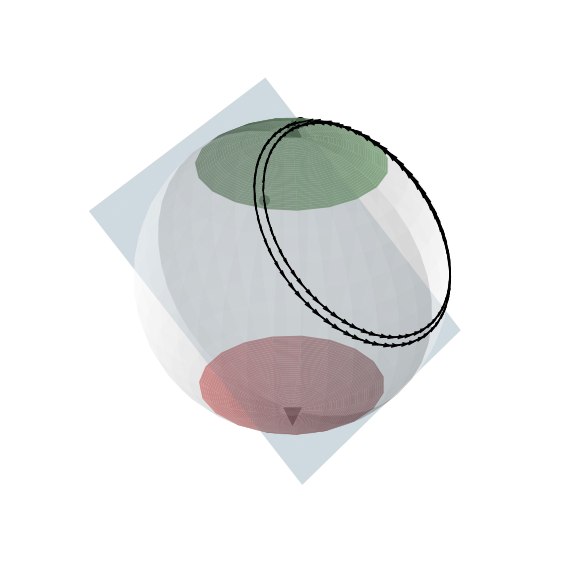

In [8]:
# %matplotlib widget
%matplotlib inline

step = 0.1
t0 = 0
t = 2*np.pi
dXdt = lambda x, t: np.sqrt(2) * np.array([-x[1], (x[0] - x[2]), x[1]])

trange = np.arange(t0, t, step=step)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d',box_aspect=(1,1,1))

plot_bloch_regions(ax, True)

for X0, Z0 in start_points:
    dataSet, ts = rk4(X0, t0, t, step, dXdt)
    dataSet = dataSet.T
    xps, yps, zps = dataSet[0], dataSet[1], dataSet[2]

    # ax.plot(xps,yps,zps, label=str(X0), color='black', ls='--')
    plt.quiver(xps[:-1], yps[:-1], zps[:-1], xps[1:]-xps[:-1], yps[1:]-yps[:-1], zps[1:]-zps[:-1], color='black')
    ax.scatter(dataSet.T[0][0],dataSet.T[0][1],dataSet.T[0][2], label=str(dataSet.T[0]), s=100, c='black')
    a = cartesian_evo(np.pi/2,X0)
    b = cartesian_evo(np.pi/2 + 0.01,X0)
    
    z_vec, o_vec = get_states(trange, Z0, had_ham)
    xs, ys, zs, _ = state_to_bloch(z_vec, o_vec)
    if False:
        print("Avg error:")
        for z in [zip(xs, xps), zip(ys, yps), zip(zs,zps)]:
            avg_error = np.mean([abs(i-j) for i,j in z])
            print(avg_error)


plt.axis('off')

# with mpl.cbook.get_sample_data("ket0.png") as file:
#     arr_img0 = plt.imread(file)
# with mpl.cbook.get_sample_data("ket1.png") as file:
#     arr_img1 = plt.imread(file)
# imgs = [arr_img0, arr_img1]
# from ImageAnnotations3D import ImageAnnotations3D
# ax2 = fig.add_subplot(111,frame_on=False)
# ax2.axis("off")
# ax2.axis([0,1,0,1])
# ia = ImageAnnotations3D([[0,0,1.05],[0,0,-1.05]],imgs,ax, ax2 )

fig.tight_layout()
# plt.legend()
# save('normal_bloch.png')
# ax.set_yticks([])
# ax.set_ylabel('')
# ax.azim = -90
# ax.elev = 1
# save('side_bloch.png')

# ax.set_zticks([])
# ax.set_zlabel('')
# ax.azim = 270
# ax.elev = 90
# save('above_bloch.png')

plt.show()

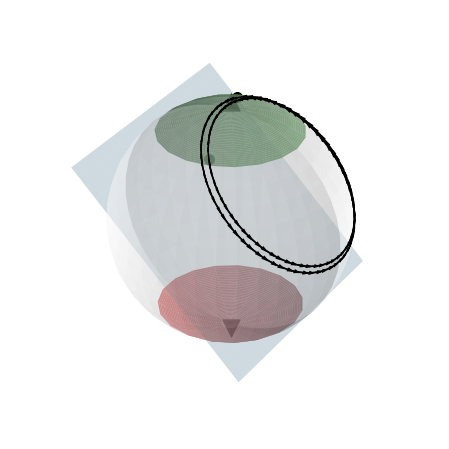

In [9]:
%matplotlib inline

dXdt = lambda x, t: np.sqrt(2) * np.array([-x[1], (x[0] - x[2]), x[1]]) + np.array([0,0,0])

trange = np.arange(t0, t, step=step)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d',box_aspect=(1,1,1))

plot_bloch_regions(ax, True)

# start_points = []
# for i in range(2):
#     start_points.append(cart_bloch_init())

for X0, Z0 in start_points:
    dataSet, ts = rk4(X0, t0, t, step, dXdt)
    dataSet = dataSet.T
    xps, yps, zps = dataSet[0], dataSet[1], dataSet[2]

    # ax.plot(xps,yps,zps, label=str(X0), color='black', ls='--')
    plt.quiver(xps[:-1], yps[:-1], zps[:-1], xps[1:]-xps[:-1], yps[1:]-yps[:-1], zps[1:]-zps[:-1], color='black')
    ax.scatter(dataSet.T[0][0],dataSet.T[0][1],dataSet.T[0][2], label=str(dataSet.T[0]), s=100, c='black')
    a = cartesian_evo(np.pi/2,X0)
    b = cartesian_evo(np.pi/2 + 0.01,X0)
    
    z_vec, o_vec = get_states(trange, Z0, had_ham)
    xs, ys, zs, _ = state_to_bloch(z_vec, o_vec)
    if False:
        print("Avg error:")
        for z in [zip(xs, xps), zip(ys, yps), zip(zs,zps)]:
            avg_error = np.mean([abs(i-j) for i,j in z])
            print(avg_error)


plt.axis('off')
# save('normal_bloch.png')
# ax.set_yticks([])
# ax.set_ylabel('')
# ax.azim = -90
# ax.elev = 1
# save('side_bloch.png')

# ax.set_zticks([])
# ax.set_zlabel('')
# ax.azim = 270
# ax.elev = 90
# save('above_bloch.png')

plt.show()

In [10]:
%matplotlib inline

X0, Z0 = cart_bloch_init()
dataSet, ts = rk4(X0, t0, t, step, dXdt)
dataSet = dataSet.T
numDataPoints = len(ts)

def animate_func(num):
    ax.clear()
    
    # Plots sphere
    plot_bloch_regions(ax)

    # Plots trajectory line
    ax.plot(dataSet[0, :num+1], dataSet[1, :num+1], 
              dataSet[2, :num+1], color='blue')

    # Updating Point Location
    ax.scatter(dataSet[0, num], dataSet[1, num], dataSet[2, num], 
               color='blue', marker='o', s=100)
    
    # Add start point
    origin = str((dataSet[0, 0], dataSet[1, 0], dataSet[2, 0]))
    ax.plot3D(dataSet[0, 0], dataSet[1, 0], dataSet[2, 0],
              c='black', marker='o', label=origin)

    # Setting Axes Limits
    ax.set_xlim3d([-1, 1])
    ax.set_ylim3d([-1, 1])
    ax.set_zlim3d([-1, 1])

    # Adding Figure
    ax.set_title('Rotated Cartesian Evolution\nTime = ' + str(np.round(ts[num],    
                 decimals=2)) + ' sec')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',box_aspect=(1,1,1))

# Plotting the Animation
# line_ani = animation.FuncAnimation(fig, animate_func, interval=100,   
#                                    frames=numDataPoints)

# anim = HTML(line_ani.to_jshtml())
plt.close(fig)
print(X0)
# anim

[-0.3082397581438825, 0.21826841074129538, 0.9259304252328411]
